In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime, timedelta

Notes for the code:
- need to restrict flows to $\mathbf{R}_{++}$

## Incidence Matrix Initiation

**Enumeration of Lakes for the Incidence Matrix:**
- Lake Superior: 1
- Lake Michigan/Huron : 2
- Lake St. Clair: 3
- Lake Erie: 4
- Lake Ontario: 5
- Sink (including all bodies of water after the St. Lawrence River): 6


**Enumeration of Edges for the Incidence Matrix:**
- St. Mary's River: (1, 2)
- St. Clair River: (2, 3)
- Detroit River: (3, 4)
- Niagra River: (4, 5)
- St. Lawrence River: (5, 6)

We take the following DAG $G = (N, E)$, where $V = \left\{ 1, 2, 3, 4, 5, 6 \right\}$ and $E = \left\{ (1, 2), (2, 3), (3, 4), (4, 5), (5, 6) \right\}$, where $(i, j) \in E$ is an ordered pair representing an edge from node $i$ to node $j$.

In [2]:
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
N = 6
L = 5

# Create an empty matrix to populate
A = np.zeros((N, L))

In [3]:
# Populate the matrix
edge_counter = 0
for edge in edges:
    i = edge[0] - 1
    j = edge[1] - 1
    A[i, edge_counter] = -1
    A[j, edge_counter] = 1
    edge_counter += 1

In [4]:
# Incidence Matrix
A

array([[-1.,  0.,  0.,  0.,  0.],
       [ 1., -1.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  1.]])

Now we need to evaluate the following

$ y_{t+1} = Ax_t + s_t $

where $x_t \in \mathbf{R}^{5}$ is the total flow for the month and $s_t \in \mathbf{R}^{6}, s_6 = 0$ are the net flows for that month. 

In [5]:
# Flow between Superior and Heron
A[0, 0] = A[0,0] * (1 / (82.103 * 1e9 ))
A[1, 0] = A[1,0] * (1 / (117.63 * 1e9 ))

# Flow between Heron and Clair
A[1, 1] = A[1,1] * (1 / (117.63 * 1e9 ))
A[2, 1] = A[2,1] * (1 / (1.11 * 1e9 ))

# Flow between Clair and Erie
A[2, 2] = A[2,2] * (1 / (1.11 * 1e9 ))
A[3, 2] = A[3, 2] * (1 / (25.74 * 1e9))

# Flow between Erie and Ontario
A[3, 3] = A[3, 3] * (1 / (25.74 * 1e9))
A[4, 3] = A[4, 3] * (1 / (18.96 * 1e9))

# Flow out of Ontario and into Sink
A[4, 4] = A[4, 4] * (1 / (18.96 * 1e9))
# A[5, 4] = A[5, 4]

In [6]:
flow_data = np.load('../Data/flow-vectors.npy')

exogenous_data = np.load('../Data/exogenous_2012_forward.npy')

depth_data = np.load('../Data/depth_vectors.npy')

Note that the exogenous data sources do not have Sep, Oct, Nov, Dec.

# First Simulation Attempt

In [7]:
# Define initial variables required for the simulation
s = exogenous_data
x = flow_data
initial_height = np.append(depth_data[144], 0)

In [8]:
# Initialize storage variables
Y = [initial_height]
for t in range(1, len(s) + 1):
    y_t = A @ x[t-1] + np.append(s[t-1], 0) # flow
    sa_t = Y[t-1] + y_t
    Y.append(sa_t)

Y = np.array(Y)

## Graphs: Calculated Depth vs Historical Depth

In [9]:
# Define dates needed to label x-axis
start_date = datetime(2012, 1, 1)
end_date = datetime(2020, 8, 31)
date_range = [start_date + timedelta(days=i * 30) for i in range(len(Y[:, 0]))]

lake_names = ["Lake Superior", "Lakes Michigan & Huron", "Lake Saint Clair", "Lake Erie", "Lake Ontario"]


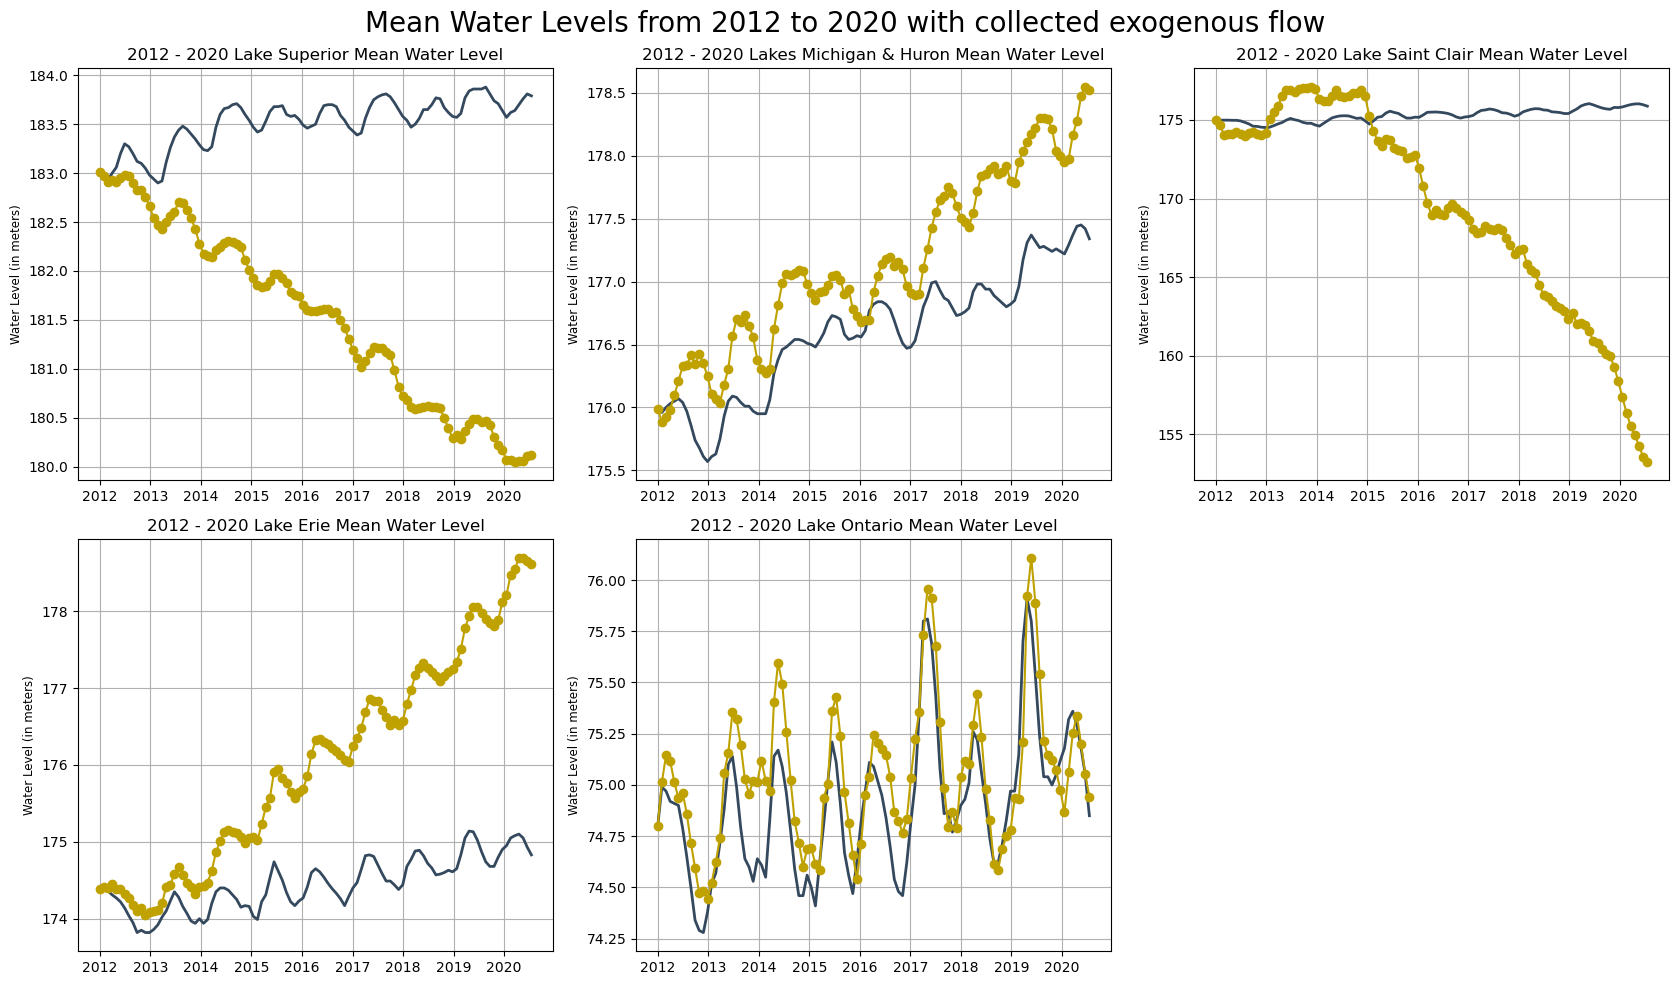

In [10]:
# Set up subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))
plt.suptitle('Mean Water Levels from 2012 to 2020 with collected exogenous flow', fontsize=20)

# Iterate over each subplot and plot the data
for n in range(5):
    row = n // 3  
    col = n % 3

    axs[row, col].plot(date_range, depth_data[144:249, n], linewidth=2, linestyle='-', color='#34495E')
    axs[row, col].plot(date_range, Y[:, n], marker='o', linestyle='-', color='#BFA100')

    axs[row, col].set_title(f'2012 - 2020 {lake_names[n]} Mean Water Level')

    axs[row, col].set_ylabel('Water Level (in meters)', fontsize=8.5)
    axs[row, col].grid(True)

# Adjust layout to presvent overlapping titles and labels
plt.tight_layout()
axs[1, 2].axis('off')

# Show the plot
plt.show()

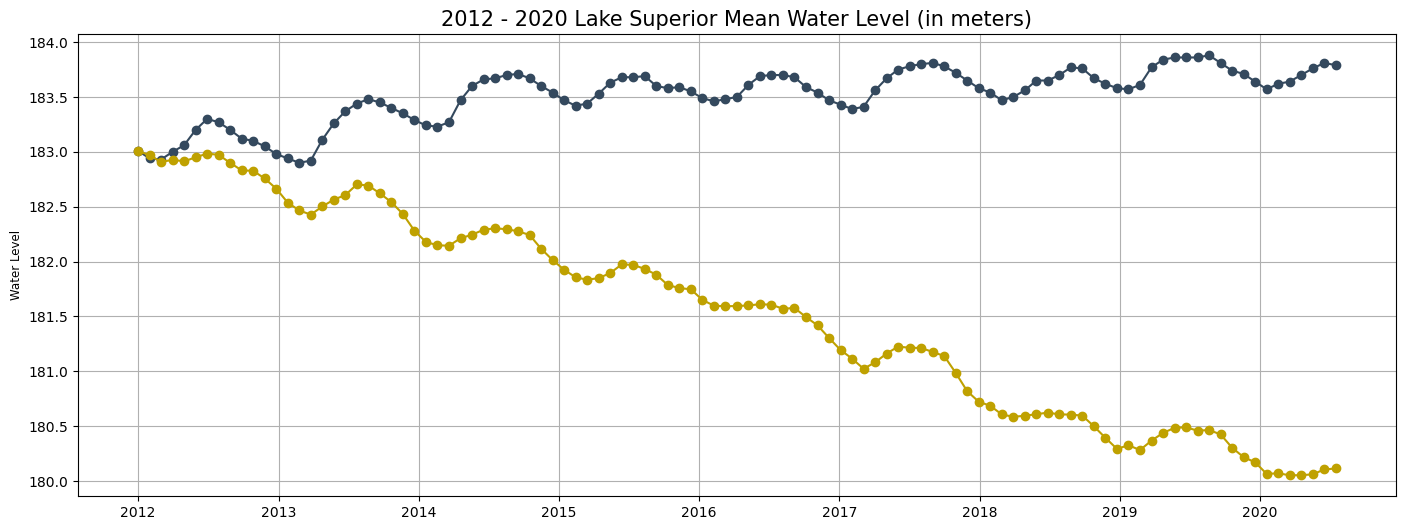

In [11]:
plt.figure(figsize=(17, 6))
plt.plot(date_range, depth_data[144:249, 0], marker='o', linestyle='-', color='#34495E')
plt.plot(date_range, Y[:, 0], marker='o', linestyle='-', color='#BFA100')
plt.title(f'2012 - 2020 Lake Superior Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

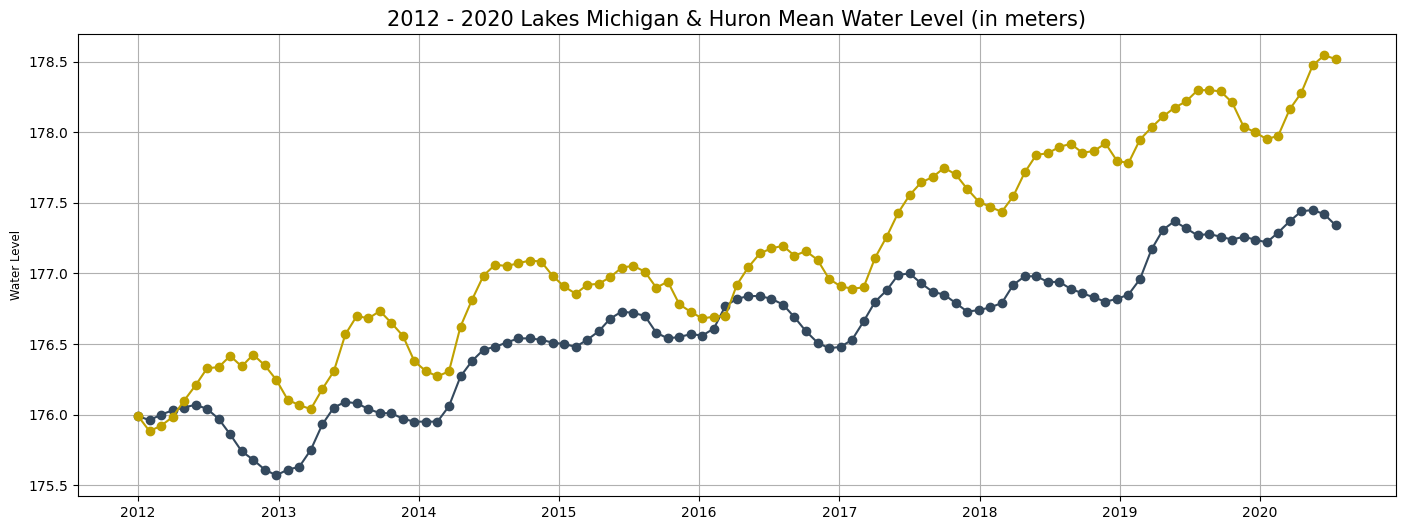

In [12]:
plt.figure(figsize=(17, 6))
plt.plot(date_range, depth_data[144:249, 1], marker='o', linestyle='-', color='#34495E')
plt.plot(date_range, Y[:, 1], marker='o', linestyle='-', color='#BFA100')
plt.title(f'2012 - 2020 Lakes Michigan & Huron Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

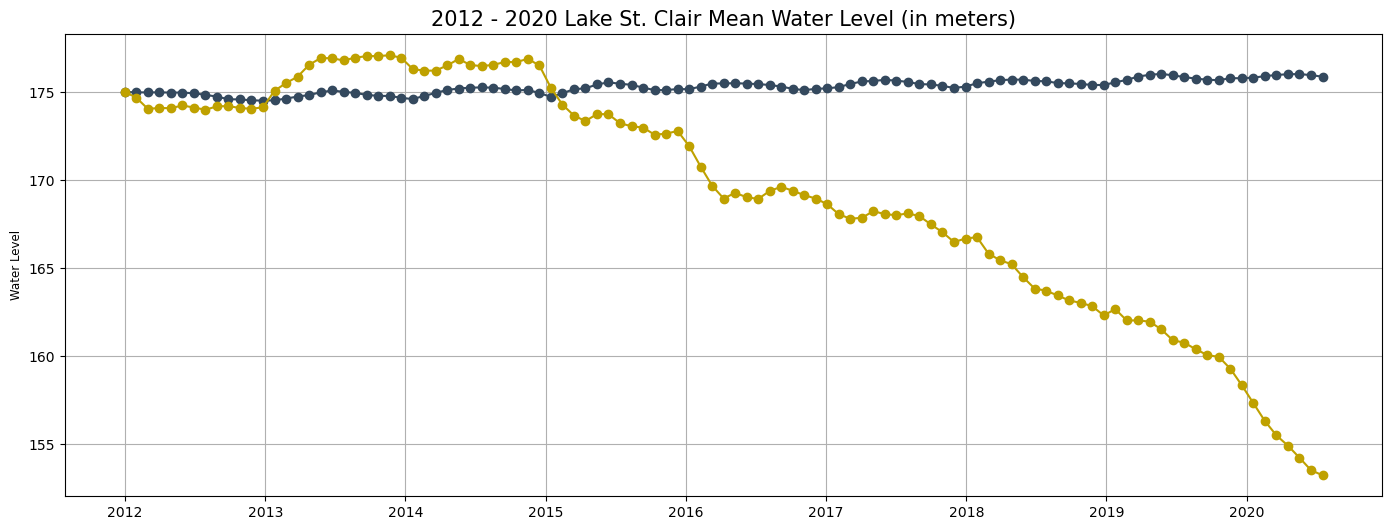

In [13]:
plt.figure(figsize=(17, 6))
plt.plot(date_range, depth_data[144:249, 2], marker='o', linestyle='-', color='#34495E')
plt.plot(date_range, Y[:, 2], marker='o', linestyle='-', color='#BFA100')
plt.title(f'2012 - 2020 Lake St. Clair Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

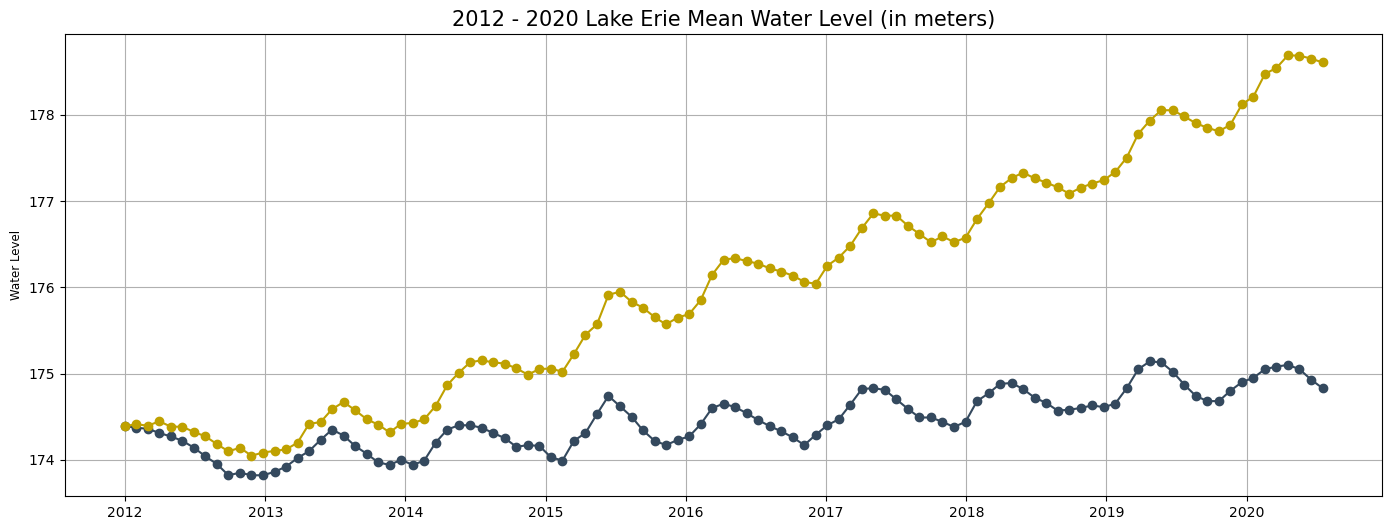

In [14]:
plt.figure(figsize=(17, 6))
plt.plot(date_range, depth_data[144:249, 3], marker='o', linestyle='-', color='#34495E')
plt.plot(date_range, Y[:, 3], marker='o', linestyle='-', color='#BFA100')
plt.title(f'2012 - 2020 Lake Erie Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

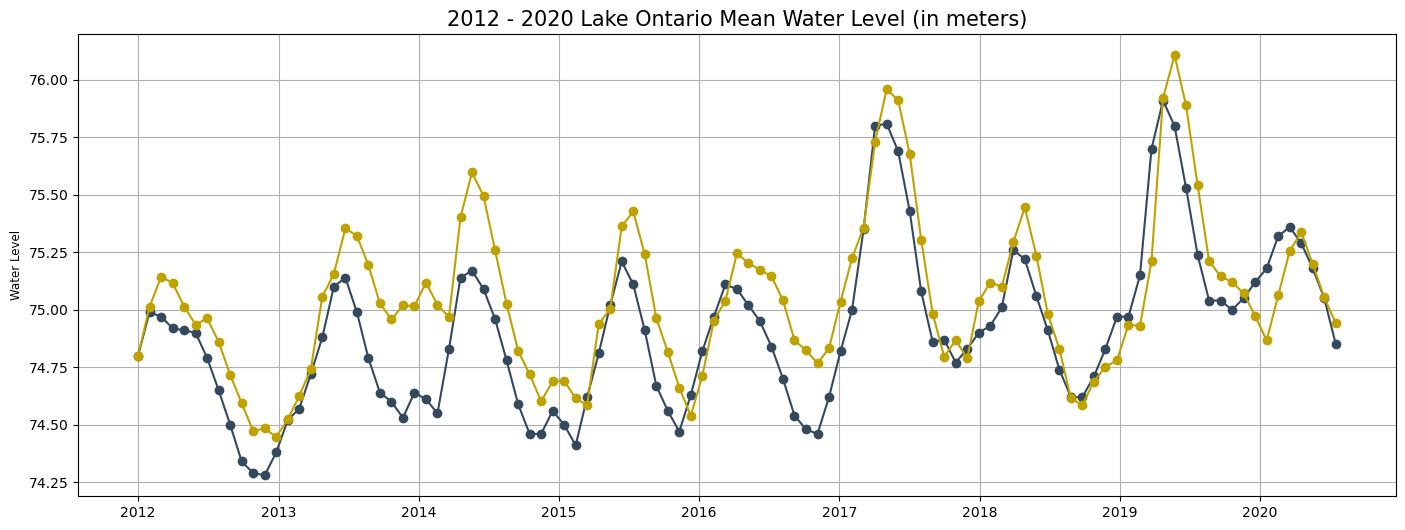

In [15]:
plt.figure(figsize=(17, 6))
plt.plot(date_range, depth_data[144:249, 4], marker='o', linestyle='-', color='#34495E')
plt.plot(date_range, Y[:, 4], marker='o', linestyle='-', color='#BFA100')
plt.title(f'2012 - 2020 Lake Ontario Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

## Evaluate accuracy of the weather data

Note: z is the calculated exogenous flow based on historical data

In [16]:
# Supplemental Variables
lake_areas = [82.103 * 1e9, 117.63 * 1e9, 1.11 * 1e9, 25.74 * 1e9, 18.96 * 1e9]

lake_names = ["Lake Superior", "Lakes Michigan & Huron", "Lake Saint Clair", "Lake Erie", "Lake Ontario"]

# Define dates needed to label x-axis
start_date = datetime(2012, 1, 1)
end_date = datetime(2020, 8, 31)

In [17]:
stc_depth_test = depth_data[144:250, 2]

stc_river_flow_test = flow_data[:-3, 1]/(1.11 * 1e9)

detroit_river_flow_test = flow_data[:-3, 2]/(1.11 * 1e9)

stc_z_calculated = [stc_depth_test[i + 1] - stc_depth_test[i] for i in range(len(stc_depth_test) - 1)] + (detroit_river_flow_test - stc_river_flow_test)

In [18]:
def calculate_z(depth, flow, lake_num):
    current_depth = depth[144:250, lake_num]

    if lake_num == 0:
        river_out_flow = flow[:-3, lake_num] / lake_areas[lake_num]
        
        z_calculated = [current_depth[i + 1] - current_depth[i] for i in range(len(current_depth) - 1)] + (river_out_flow)

    else:

        river_in_flow = flow[:-3, lake_num-1] / lake_areas[lake_num]
        river_out_flow = flow[:-3, lake_num] / lake_areas[lake_num]

        z_calculated = [current_depth[i + 1] - current_depth[i] for i in range(len(current_depth) - 1)] + (river_out_flow - river_in_flow)

    return z_calculated



s_calculated = [list(x) for x in zip(calculate_z(depth_data, flow_data, 0), calculate_z(depth_data, flow_data, 1), calculate_z(depth_data, flow_data, 2), 
                                     calculate_z(depth_data, flow_data, 3), calculate_z(depth_data, flow_data, 4))]

In [19]:
# Initialize storage variables
Y_prime = [initial_height]

for t in range(1, len(s_calculated)):
    y_t = A @ x[t-1] + np.append(s_calculated[t-1], 0)
    sa_t = Y_prime[t-1] + y_t
    Y_prime.append(sa_t)

Y_prime = np.array(Y_prime)

In [20]:
date_range = [start_date + timedelta(days=i * 30) for i in range(len(Y[:, 0]))]

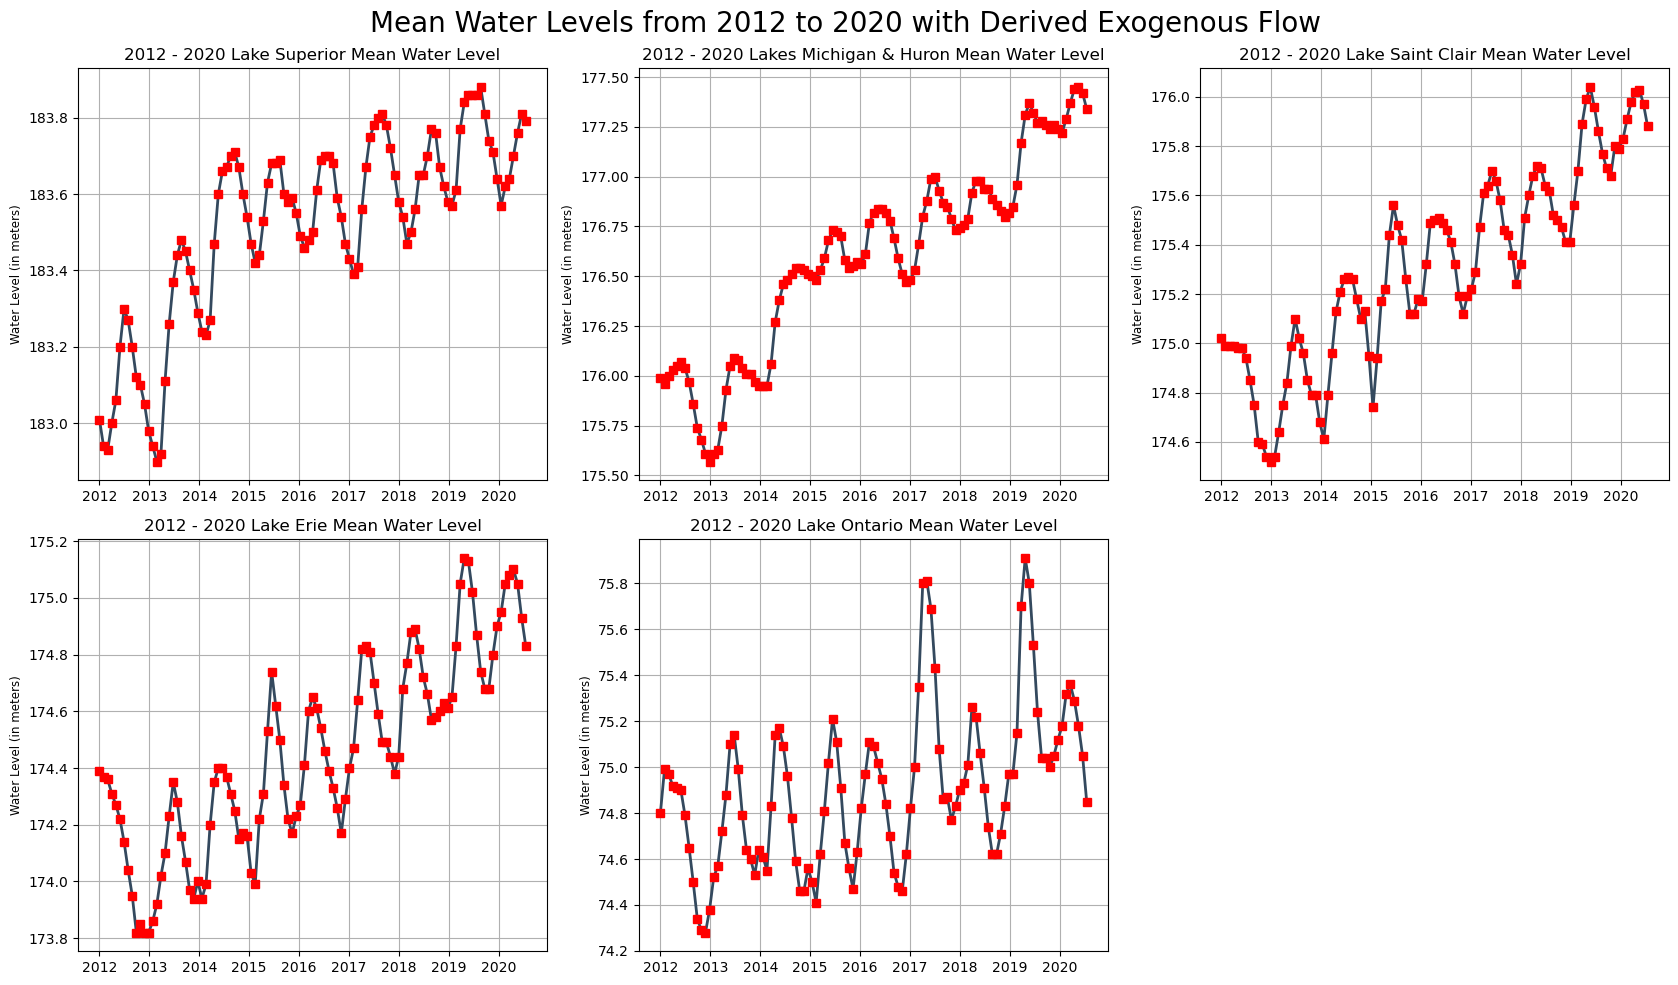

In [21]:
# Set up subplots for data with s_calculated
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))
plt.suptitle('Mean Water Levels from 2012 to 2020 with Derived Exogenous Flow', fontsize=20)

# Iterate over each subplot and plot the data
for n in range(5):
    row = n // 3  
    col = n % 3

    axs[row, col].plot(date_range, depth_data[144:249, n], linewidth=2, linestyle='-', color='#34495E')
    axs[row, col].plot(date_range, Y_prime[:, n], marker='s', linestyle='', color='#FF0000')
    axs[row, col].set_title(f'2012 - 2020 {lake_names[n]} Mean Water Level')

    axs[row, col].set_ylabel('Water Level (in meters)', fontsize=8.5)
    axs[row, col].grid(True)

# Adjust layout to presvent overlapping titles and labels
plt.tight_layout()
axs[1, 2].axis('off')

# Show the plot
plt.show()

In [24]:
len(s_calculated)

105

In [27]:
s_calculated_arr = np.array(s_calculated)

In [30]:
len(s_calculated_arr[:, 4])

105

In [28]:
np.save('../Data/calculated_nbs.npy', s_calculated_arr)